In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set()

In [95]:
df = pd.read_csv('messages.csv')

In [96]:
df.head()

,date,message
0,2023-04-10 14:37:24+00:00,2 room Flat for rent. Isani\n\nАдрес: navtlug...
1,2023-04-10 14:31:41+00:00,2 room Flat for rent. Nadzaladevi\n\nАдрес: T...
2,2023-04-10 14:31:11+00:00,Newly finished apartment for rent\n\nАдрес: 36...
3,2023-04-10 14:28:55+00:00,2 room Flat for rent. Didube\n\nАдрес: a.were...
4,2023-04-10 14:18:36+00:00,2 room Flat for rent. Gldani\n\nАдрес: I Micr...


In [97]:
print(df['message'][0])

2 room Flat for rent.  Isani

Адрес: navtlugi st. 10ა,

Дата: 10.04.2023 18:29
Этаж: 2
Площадь: 52 м²
Комнат: 2
Спален: 1
Комментарий: ქირავდება ისანში, ნავთლუღის ქუჩაზე, კარფურთან. 52კვ.მ.  იზოლირებული საძინებლით. ავეჯით. ტექნიკით. ფასი: 600$ შესაბამისი კურისით ლარებში  ტელ: 593144470 ეკა
--------
Сдается в Исане, на улице Навтлуги, возле Carrefour. 52 кв.м. с изолированной спальней. с мебелью. с оборудованием. Цена: $600 по соответствующему курсу в лари Тел: 593144470 Эка

Цена: 600$

Связь: WhatsApp

На карте: maps.google.com
URL: ss.ge


In [98]:
floor_regex = r'Этаж: (\d+)'
area_regex = r'Площадь: (\d+) м²'
rooms_regex = r'Комнат: (\d+)'
bedrooms_regex = r'Спален: (\d+)'
district_regex = r'rent\. (.*)'
price_regex = r'Цена: (\d+)\$'

In [99]:
df['district'] = df['message'].str.extract(district_regex)
df['area'] = df['message'].str.extract(area_regex)
df['floor'] = df['message'].str.extract(floor_regex)
df['rooms'] = df['message'].str.extract(rooms_regex)
df['bedrooms'] = df['message'].str.extract(bedrooms_regex)
df['price'] = df['message'].str.extract(price_regex)

In [100]:
df.dropna(inplace=True)

In [101]:
df['district'] = df['district'].str.strip()
df['area'] = df['area'].str.strip().astype(float)
df['floor'] = df['floor'].str.strip().astype(int)
df['rooms'] = df['rooms'].str.strip().astype(int)
df['bedrooms'] = df['bedrooms'].str.strip().astype(int)
df['price'] = df['price'].str.strip().astype(int)

In [102]:
df

,date,message,district,area,floor,rooms,bedrooms,price
0,2023-04-10 14:37:24+00:00,2 room Flat for rent. Isani\n\nАдрес: navtlug...,Isani,52.0,2,2,1,600
1,2023-04-10 14:31:41+00:00,2 room Flat for rent. Nadzaladevi\n\nАдрес: T...,Nadzaladevi,55.0,6,2,1,650
3,2023-04-10 14:28:55+00:00,2 room Flat for rent. Didube\n\nАдрес: a.were...,Didube,55.0,8,2,1,550
4,2023-04-10 14:18:36+00:00,2 room Flat for rent. Gldani\n\nАдрес: I Micr...,Gldani,44.0,14,2,1,450
5,2023-04-10 14:15:54+00:00,2 room Flat for rent. Digomi 1 - 9\n\nАдрес: ...,Digomi 1 - 9,50.0,12,2,1,649
...,...,...,...,...,...,...,...,...
49994,2022-04-05 07:30:50+00:00,2 room Flat for rent. Vedzisi\n\nАдрес: Onias...,Vedzisi,45.0,2,2,1,500
49995,2022-04-05 07:20:10+00:00,4 room Flat for rent. Nutsubidze plateau\n\nА...,Nutsubidze plateau,100.0,5,4,2,550
49996,2022-04-05 07:10:11+00:00,3 room Flat for rent. Districts of Vazha-Psha...,Districts of Vazha-Pshavela,80.0,6,3,2,650
49998,2022-04-05 06:30:23+00:00,1 room Flat for rent. Isani\n\nАдрес: Lekh Ka...,Isani,31.0,4,1,1,300


In [103]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39888 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      39888 non-null  object 
 1   message   39888 non-null  object 
 2   district  39888 non-null  object 
 3   area      39888 non-null  float64
 4   floor     39888 non-null  int64  
 5   rooms     39888 non-null  int64  
 6   bedrooms  39888 non-null  int64  
 7   price     39888 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 2.7+ MB


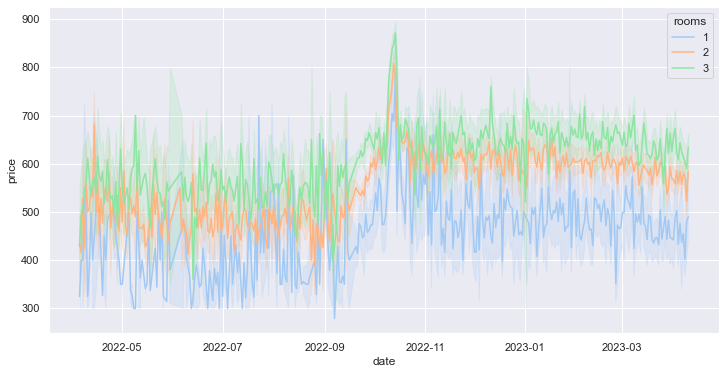

In [115]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("pastel", 3)
sns.lineplot(data=df[df['rooms'] <= 3], x='date', y='price', hue='rooms', palette=palette);

In [92]:
df['district'].unique()

array(['Isani', 'Didi digomi', 'Nutsubidze plateau', 'Saburtalo',
       'Samgori', 'Digomi 1 - 9', 'Mukhiani', 'Didube', 'Mtatsminda',
       'Chugureti', 'Varketili', 'Gldani', 'Temqa',
       'Districts of Vazha-Pshavela', 'Sololaki', 'Digomi',
       'Mesame masivi', 'Lisi lake', 'Vashlijvari', 'Ortachala',
       'Avchala', 'Sanzona', 'Nadzaladevi', 'Vake', 'Avlabari', 'Bagebi',
       'Navtlugi', 'Vazisubani', 'Vera', 'Vedzisi', 'Elia',
       'Digomi village', 'Koniaki village', 'Zahesi',
       'One bedroom with spacious living room. 80m2. Second floor. New building.',
       'The apartment has all necessary appliances and furniture.',
       'Kukia',
       'In a newly built building. With three rooms, two bedrooms, furniture and full equipment. 2 minutes&#39; walk from the Varketili metro station. I am the owner! The price is $650',
       'Airport village', 'Ponichala', 'Abanotubani', 'Afrika',
       'I am the owner.', 'Tbilisi sea',
       'with all necessary appliances an